In [1]:
import pandas as pd

In [2]:
series = pd.Series([2, 4, 6])
series.index    # 0, 1, 2 (RangeIndex (Auto gerated idx))
series.values   # 2, 4, 6

array([2, 4, 6], dtype=int64)

In [3]:
# set custom index
series = pd.Series([2, 4, 6], index=["a", "b", "c"])
series

a    2
b    4
c    6
dtype: int64

In [4]:
# load csv
df = pd.read_csv("sample_data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# get col names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# get shape
print(f"{len(df)} x {len(df.columns)}")

891 x 12


In [7]:
# select rows
df.head(1)   # DataFrame, default row cnt : 5
df.tail(1)   # DataFrame, default row cnt : 5
df[0:1]      # DataFrame
df.loc[[0]]  # DataFrame
df.loc[0]    # Series

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [8]:
# select cols
df.Survived             # Series
df["Survived"]          # Series
df[["Survived"]]        # DataFrame (can choose multi cols)
df[df.columns[1]]       # Series
df[df.columns[[1]]]     # DataFrame (can choose multi cols)
df.loc[:, "Survived"]   # Series
df.loc[:, ["Survived"]] # DataFrame (can choose multi cols)

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [9]:
# select multi cols (return DataFrame)
df[["Survived", "Pclass"]]          # name
df[df.columns[[1, 2]]]              # idx
df.loc[:, ["Survived", "Pclass"]]   # name
df.loc[:, "Survived": "Pclass"]     # range

Survived  Pclass
0           0       3
1           1       1
2           1       3
3           1       1
4           0       3
..        ...     ...
886         0       2
887         1       1
888         0       3
889         1       1
890         0       3

[891 rows x 2 columns]

In [10]:
# select rows and cols
df.loc[0:2, ["Survived", "Pclass"]] # get 0-2nd rows and 2 cols 
df.iloc[0:2, 0:2]                   # get 0,1 rows of 0,1 cols
df.iloc[1, 2]                       # get 1st row of 2st col
df.at[1, "Survived"]                # get 1st row of 1st col

1

In [11]:
# count distinct values from column (discrete variable)
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# count distinct values from multi columns (discrete variable)
df[["Survived", "Pclass"]].value_counts()

Survived  Pclass
0         3         372
1         1         136
          3         119
0         2          97
1         2          87
0         1          80
dtype: int64

In [13]:
print(f"count: {df['Age'].count()}")
print(f"mean: {df['Age'].mean()}")
print(f"sum: {df['Age'].sum()}")
print(f"var: {df['Age'].var()}")
print(f"std: {df['Age'].std()}")
print(f"min: {df['Age'].min()}")
print(f"25%: {df['Age'].quantile(0.25)}")
print(f"med: {df['Age'].median()}")
print(f"75%: {df['Age'].quantile(0.75)}")
print(f"max: {df['Age'].max()}")
print(f"skew: {df['Age'].skew()}")
print(f"kurt: {df['Age'].kurt()}")

count: 714
mean: 29.69911764705882
sum: 21205.17
var: 211.01912474630802
std: 14.526497332334042
min: 0.42
25%: 20.125
med: 28.0
75%: 38.0
max: 80.0
skew: 0.38910778230082704
kurt: 0.17827415364210353


In [14]:
print(f"argmin: {df['Age'].argmin()}")  # get idx of min value
print(f"argmax: {df['Age'].argmax()}")  # get idx of max value
print(df.loc[df['Age'].argmin()])       # get row with min value
print(df.loc[df['Age'].argmax()])       # get row with max value

argmin: 803
argmax: 630
PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object
PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                  

In [15]:
# get descriptive statistics of column (continuous variable)
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# get descriptive statistics of multiple columns (continuous variable)
df[["Age", "Fare"]].describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

<AxesSubplot:>

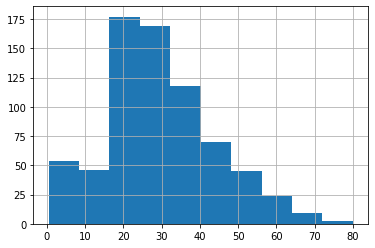

In [17]:
# get histogram from Series
df["Age"].hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

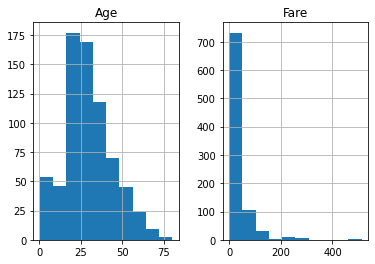

In [18]:
# get histograms from df
df[["Age", "Fare"]].hist()

<AxesSubplot:>

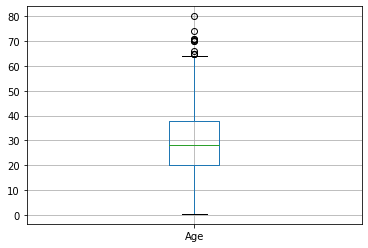

In [19]:
# get boxplot from df (cannot plot with series)
df[["Age"]].boxplot()

<AxesSubplot:>

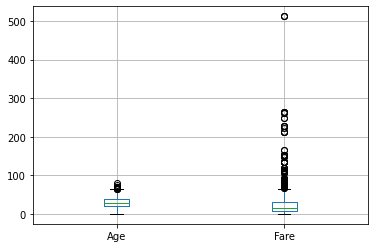

In [20]:
# get boxplot from df
df[["Age", "Fare"]].boxplot()

In [21]:
# describe each groups (X:Pclass, Y:Fare)
df.groupby("Pclass")[["Fare"]].describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [22]:
# get correlations of each columns
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [23]:
# get correlation of two columns (default : pearson method)
df[["Age", "Survived"]].corr()

Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000

In [24]:
# get pearson correlation of two columns (includes continuous variable)
df[["Age", "Survived"]].corr(method="pearson")

Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000

In [25]:
# get spearman correlation of two columns (includes discrete variable)
df[["Pclass", "Survived"]].corr(method="spearman")

Pclass  Survived
Pclass    1.000000 -0.339668
Survived -0.339668  1.000000

In [26]:
# get covariances of each columns
df.cov()

PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846

In [27]:
# get covariances of each columns
df[["Age", "Survived"]].cov()

Age  Survived
Age       211.019125 -0.551296
Survived   -0.551296  0.236772

In [28]:
# copy DataFrame
copy_df = df.copy()

# rename column (Survived -> Label)
copy_df.rename(columns={"Survived": "Label"}, inplace=True)

# add new column
copy_df["AgeGroup"] = copy_df["Age"] // 10
copy_df[["Age", "AgeGroup"]]

Age  AgeGroup
0    22.0       2.0
1    38.0       3.0
2    26.0       2.0
3    35.0       3.0
4    35.0       3.0
..    ...       ...
886  27.0       2.0
887  19.0       1.0
888   NaN       NaN
889  26.0       2.0
890  32.0       3.0

[891 rows x 2 columns]

In [29]:
# replace column value (org_val: new_val)
copy_df = copy_df.replace({"Sex": {"male": "man", "female": "woman"}})
copy_df.Sex.value_counts()

man      577
woman    314
Name: Sex, dtype: int64

In [30]:
# replace column value ([org_vals], [new_vals])
copy_df["Pclass"] = copy_df["Pclass"].replace([1, 2, 3], ["First", "Second", "Third"])
copy_df.Pclass.value_counts()

Third     491
First     216
Second    184
Name: Pclass, dtype: int64

In [31]:
# create new column using custom function
def get_gender_code(gender):
    if gender in ["man", "male"]:
        return 1
    elif gender in ["woman", "female"]:
        return 2
    else:
        return 3

copy_df["gender_code"] = copy_df["Sex"].apply(get_gender_code)
copy_df[["Sex", "gender_code"]]

Sex  gender_code
0      man            1
1    woman            2
2    woman            2
3    woman            2
4      man            1
..     ...          ...
886    man            1
887  woman            2
888  woman            2
889    man            1
890    man            1

[891 rows x 2 columns]

In [32]:
# convert to numpy
np_array = df.to_numpy()
np_array

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [33]:
# convert np array to pd DataFrame (col name is optional)
new_df = pd.DataFrame(
    np_array,
    columns=[
        "PassengerId",
        "Survived",
        "Pclass",
        "Name",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Ticket",
        "Fare",
        "Cabin",
        "Embarked"
    ]
)
new_df

PassengerId Survived Pclass  \
0             1        0      3   
1             2        1      1   
2             3        1      3   
3             4        1      1   
4             5        0      3   
..          ...      ...    ...   
886         887        0      2   
887         888        1      1   
888         889        0      3   
889         890        1      1   
890         891        0      3   

                                                  Name     Sex   Age SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0     1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     1   
2                               Heikkinen, Miss. Laina  female  26.0     0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     1   
4                             Allen, Mr. William Henry    male  35.0     0   
..                                                 ...     ...   ...   ...   
886                              Montvila, Rev. Juozas    male  27.0     0   
887                       Graham, Miss. Margaret Edith  female  19.0     0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN     1   
889                              Behr, Mr. Karl Howell    male  26.0     0   
890                                Dooley, Mr. Patrick    male  32.0     0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171     7.25   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282    7.925   NaN        S  
3       0            113803     53.1  C123        S  
4       0            373450     8.05   NaN        S  
..    ...               ...      ...   ...      ...  
886     0            211536     13.0   NaN        S  
887     0            112053     30.0   B42        S  
888     2        W./C. 6607    23.45   NaN        S  
889     0            111369     30.0  C148        C  
890     0            370376     7.75   NaN        Q  

[891 rows x 12 columns]